In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Start**

In [ ]:
# --- Extra Installations ---

In [3]:
!pip install emoji

In [4]:
!pip install indic-num2words

In [5]:
!pip install gdown

## 🟡 Helper Functions

In [ ]:
# --- Helper Functions ---

### ⚪ Delete File or Folder

In [4]:
import os
import shutil

def delete_file_or_folder(path):
    """
    Function to delete a file or folder.

    Parameters:
    - path (str): The path to the file or folder to be deleted.

    Returns:
    - None
    """
    try:
        # Check if the path exists
        if os.path.exists(path):
            # Check if the path is a file
            if os.path.isfile(path):
                # If it's a file, remove it using os.unlink
                os.unlink(path)
                print(f"File '{path}' has been deleted.")
            # Check if the path is a directory
            elif os.path.isdir(path):
                # If it's a directory, remove it using shutil.rmtree
                shutil.rmtree(path)
                print(f"Directory '{path}' has been deleted.")
        else:
            print(f"Path '{path}' does not exist.")
    except Exception as e:
        # Handle any exceptions that might occur during deletion
        print(f"Error occurred while deleting '{path}': {str(e)}")

# Specify the path to the file or folder to delete
file_or_folder_path = "/kaggle/working/cc.hi.300.bin.gz"
file_or_folder_path = "/kaggle/working/checkpoints"
# Call the function to delete the file or folder
delete_file_or_folder(file_or_folder_path)

Path '/kaggle/working/checkpoints' does not exist.


In [6]:
!gdown --folder https://drive.google.com/drive/folders/14zdqk6vMEb1ixZor3XbMwkujQlivnQgC?usp=drive_link -O Dataset

Retrieving folder contents
Processing file 1b2iZtrcCy18oPj1o5EsUxwgFDC4Rr0QR hindi_train.csv
Processing file 1fQufzDH1IeR3a7Tjmf4ztg6GmteEreN5 HindiNews_test.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1b2iZtrcCy18oPj1o5EsUxwgFDC4Rr0QR
From (redirected): https://drive.google.com/uc?id=1b2iZtrcCy18oPj1o5EsUxwgFDC4Rr0QR&confirm=t&uuid=e7df22f8-0241-4faf-b557-1c814758cd20
To: /kaggle/working/Dataset/hindi_train.csv
100%|█████████████████████████████████████████| 162M/162M [00:00<00:00, 218MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fQufzDH1IeR3a7Tjmf4ztg6GmteEreN5
To: /kaggle/working/Dataset/HindiNews_test.csv
100%|███████████████████████████████████████| 25.7M/25.7M [00:00<00:00, 109MB/s]
Download completed


In [7]:
import os

def print_folder_structure(folder_path, indent=""):
    """
    Recursively print the structure of a folder.

    Parameters:
    - folder_path (str): The path to the folder whose structure is to be printed.
    - indent (str): The indentation string for visualizing the hierarchy.

    Returns:
    - None
    """
    # Print the current directory name
    print(indent + os.path.basename(folder_path) + "/")

    # Iterate over the contents of the folder
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        # If the item is a directory, recursively call the function
        if os.path.isdir(item_path):
            print_folder_structure(item_path, indent + "    ")
        else:
            # If the item is a file, print its name
            print(indent + "    " + item)

# Example usage:
folder_path = "/kaggle/working/"
print("Folder Structure:")
print_folder_structure(folder_path)

Folder Structure:
/
    Dataset/
        HindiNews_test.csv
        hindi_train.csv
    .virtual_documents/


In [8]:
import pandas as pd
# Load the dataset
train_df = pd.read_csv("/kaggle/working/Dataset/hindi_train.csv")
test_df = pd.read_csv("/kaggle/input/hindi-test/test.csv")
train_df = train_df.head(15000)

In [9]:
from IPython.display import display
# Display the first few rows of the training dataset
print("Training Dataset (Number of samples: {})".format(train_df.shape[0]))
# Remove the 'Id' column from the training dataset
train_df.drop(columns=['Id'], inplace=True)
display(train_df.head())

# Display the first few rows of the test dataset
print("\nTest Dataset (Number of samples: {})".format(test_df.shape[0]))
# Remove the 'id' column from the test dataset
test_df.drop(columns=['id'], inplace=True)
display(test_df.head())

Training Dataset (Number of samples: 15000)


,Heading,Summary,Article
0,"गला दबाकर हत्या की; बॉडी बोरे में भरी, लोकल मा...",Kerala Minor Girl Rape Case - केरल के एर्नाकुल...,केरल के एर्नाकुलम जिले में 5 साल की बच्ची से र...
1,तेलंगाना में 18 की जान गई; जम्मू-कश्मीर में बा...,इस साल मानसून सीजन में कई राज्यों में भारी तबा...,मानसून सीजन में हुई भारी बारिश ने कई राज्यों म...
2,"राजस्थान सरकार बनाएगी कर्ज राहत आयोग, कोर्ट के...",चुनावी साल में राजस्थान सरकार किसानों को लुभान...,चुनावी साल में राजस्थान सरकार किसानों को लुभान...
3,"3 से 7 अगस्त तक कर सकेंगे अप्लाय, प्राइस बैंड ...",Non-banking lender SBFC Finance's initial publ...,नॉन बैंकिग फाइनेंस कंपनी 'SBFC फाइनेंस लिमिटेड...
4,"डाइनिंग टेबल पर कुकर-कड़ाही न सजाएं, चीन के खा...",स्वाद खाने की बुनियाद है। लेकिन अगर खाना सुंदर...,स्वाद खाने की बुनियाद है। लेकिन अगर खाना सुंदर...



Test Dataset (Number of samples: 2842)


,Article,Heading,Summary
0,नई दिल्ली. भारतीय जनता पार्टी ने अगले साल होने...,चुनाव वाले राज्यों के लिए BJP ने नियुक्त किए प...,उत्तर प्रदेश में भाजपा ने चुनाव के लिए अनुराग ...
1,नयी दिल्ली। मिजोरम के साथ लगी सीमा पर शांति बह...,"असम-मिजोरम सीमा पर शांति बहाल, लेकिन एक दिन मे...",मिजोरम के साथ लगी सीमा पर शांति बहाल होने का उ...
2,अरुणाचल प्रदेश के भाजपा सांसद तापिर गाओ ने कहा...,अरुणाचल से किशोर के अपहरण का मामला: सांसद गाओ...,अरुणाचल प्रदेश के भाजपा सांसद तापिर गाओ ने कहा...
3,नई दिल्ली: दिल्ली पुलिस कमिश्नर एसएन श्रीवास्त...,किसान ट्रैक्टर रैली से पहले दिल्ली पुलिस कमिश्...,दिल्ली पुलिस कमिश्नर एसएन श्रीवास्तव (SN Shriv...
4,श्रीनगर: गृह मंत्री अमित शाह के जम्मू-कश्मीर द...,Amit Shah in J&K LIVE: कश्मीर का सीएम ऐसा हो ज...,जम्मू-कश्मीर दौरे के तीसरे दिन अमित शाह आज श्र...


In [11]:
import re
import emoji
from num_to_words import num_to_word
def preprocess_text(text):
    """
    Preprocess the given text.

    Parameters:
    - text (str): The text to be preprocessed

    Returns:
    - str: Preprocessed text.
    """
    # Convert emojis to textual representations and remove emoji placeholders
    text = re.sub(r':[a-zA-Z_]+:', ' ', emoji.demojize(str(text)))
    # Remove newline, carriage return, and tab characters, underscores, hyphens, tildes, plus signs, periods, special characters,
    text = re.sub(r'[\n\r\t_\-~\+\.\s]{2,}|[<>()|&©@#ø\[\]\'\",;:.।‘’]', ' ', str(text).replace('\u200d', '').lower())
    text = re.sub("([a-zA-Z])",' ',str(text)).lower() # (*Note : currently removing english or we can convert it to hindi using API*) --- For English Removal
    text = re.sub("(\s+)",' ',str(text)).lower() # remove multiple spaces.
    # Convert numeric values to their word representation
    text = re.sub(r'\b(\d+)\b', lambda x: num_to_word(int(x.group(0)), lang='hi'), text)
    text = re.sub(r'[\n\r\t_\-~\+\.\s]{2,}|[<>()|&©@#ø\[\]\'\",;:.।‘’]', ' ', str(text).replace('\u200d', '').lower())
    return text.strip()

# Example usage:
text_to_preprocess = "\t(सांसदी)__ ++++ \n\nhello Kerala...      \tGirl  Case - केरल के एर्नाकुल...जाने के बाद 🎉अप्रैल ||| में सरकारी9 बंगला 44 🏠छोड़...😊"
text_to_preprocess =  "नोकिया C12 प्लस में 6.3 इंच HD प्लस डिस्प्ले के साथ मिलेगी 4000mAh बैटरी, कीमत 7,999 रुपए,"
preprocessed_text = preprocess_text(text_to_preprocess)
print(preprocessed_text)

नोकिया बारह प्लस में छः तीन इंच प्लस डिस्प्ले के साथ मिलेगी चार हज़ार बैटरी कीमत सात नौ सौ  निन्यानवे रुपए


In [12]:
from IPython.display import display
from tqdm import tqdm  # Import tqdm

# Preprocess all columns of the training dataset
print("Training Dataset (Number of samples: {})".format(train_df.shape[0]))
for col in train_df.columns:
    tqdm.pandas(desc=f"Preprocessing {col}")  # Add tqdm progress bar for each column
    train_df[col] = train_df[col].progress_apply(preprocess_text)
display(train_df.head())

# Preprocess all columns of the test dataset
print("\nTest Dataset (Number of samples: {})".format(test_df.shape[0]))
for col in test_df.columns:
    tqdm.pandas(desc=f"Preprocessing {col}")  # Add tqdm progress bar for each column
    test_df[col] = test_df[col].progress_apply(preprocess_text)
display(test_df.head())

Training Dataset (Number of samples: 15000)


Preprocessing Article: 100%|██████████| 15000/15000 [02:01<00:00, 123.07it/s]


,Heading,Summary,Article
0,गला दबाकर हत्या की बॉडी बोरे में भरी लोकल मार्...,केरल के एर्नाकुलम जिले में पाँच साल की बच्ची स...,केरल के एर्नाकुलम जिले में पाँच साल की बच्ची स...
1,तेलंगाना में अट्ठारह की जान गई जम्मू-कश्मीर मे...,इस साल मानसून सीजन में कई राज्यों में भारी तबा...,मानसून सीजन में हुई भारी बारिश ने कई राज्यों म...
2,राजस्थान सरकार बनाएगी कर्ज राहत आयोग कोर्ट के ...,चुनावी साल में राजस्थान सरकार किसानों को लुभान...,चुनावी साल में राजस्थान सरकार किसानों को लुभान...
3,तीन से सात अगस्त तक कर सकेंगे अप्लाय प्राइस बै...,नॉन बैंकिग फाइनेंस कंपनी फाइनेंस लिमिटेड का पब...,नॉन बैंकिग फाइनेंस कंपनी फाइनेंस लिमिटेड का पब...
4,डाइनिंग टेबल पर कुकर-कड़ाही न सजाएं चीन के खान...,स्वाद खाने की बुनियाद है लेकिन अगर खाना सुंदर ...,स्वाद खाने की बुनियाद है लेकिन अगर खाना सुंदर ...



Test Dataset (Number of samples: 2842)


Preprocessing Summary: 100%|██████████| 2842/2842 [00:01<00:00, 1892.60it/s]


,Article,Heading,Summary
0,नई दिल्ली भारतीय जनता पार्टी ने अगले साल होने ...,चुनाव वाले राज्यों के लिए ने नियुक्त किए प्रभा...,उत्तर प्रदेश में भाजपा ने चुनाव के लिए अनुराग ...
1,नयी दिल्ली मिजोरम के साथ लगी सीमा पर शांति बहा...,असम-मिजोरम सीमा पर शांति बहाल लेकिन एक दिन में...,मिजोरम के साथ लगी सीमा पर शांति बहाल होने का उ...
2,अरुणाचल प्रदेश के भाजपा सांसद तापिर गाओ ने कहा...,अरुणाचल से किशोर के अपहरण का मामला सांसद गाओ न...,अरुणाचल प्रदेश के भाजपा सांसद तापिर गाओ ने कहा...
3,नई दिल्ली दिल्ली पुलिस कमिश्नर एसएन श्रीवास्तव...,किसान ट्रैक्टर रैली से पहले दिल्ली पुलिस कमिश्...,दिल्ली पुलिस कमिश्नर एसएन श्रीवास्तव ने गणतंत्...
4,श्रीनगर गृह मंत्री अमित शाह के जम्मू-कश्मीर दौ...,कश्मीर का सीएम ऐसा हो जो लंदन ना जाए अमित शाह,जम्मू-कश्मीर दौरे के तीसरे दिन अमित शाह आज श्र...


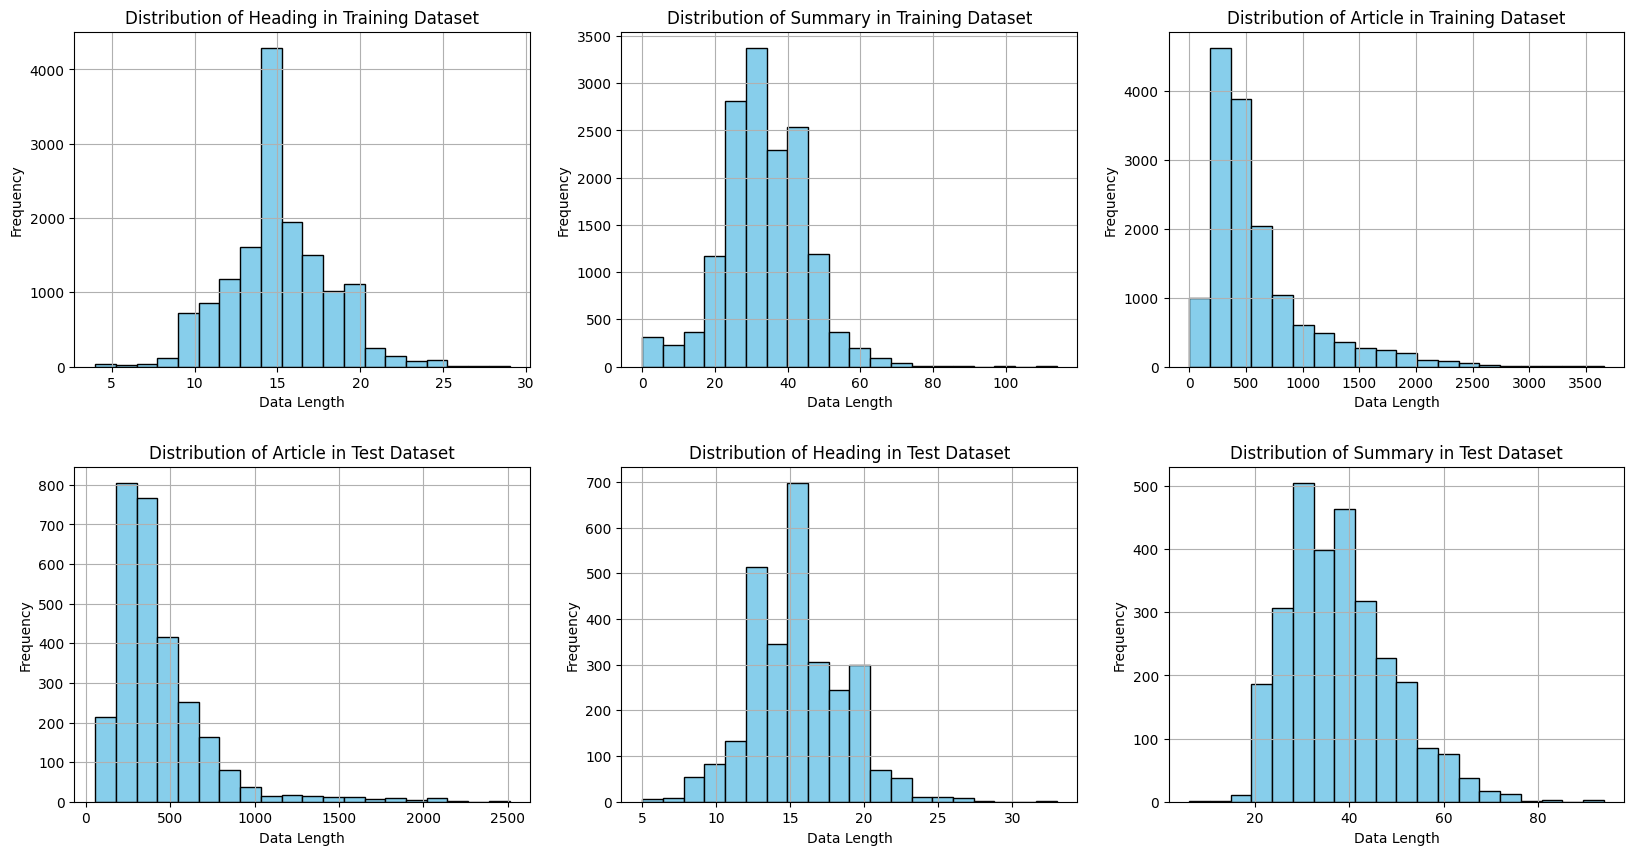

In [13]:
import matplotlib.pyplot as plt

# Function to plot distribution of data in a column
def plot_distribution(ax, data, title):
    # Split the text using space and get the lengths of resulting tokens
    lengths = [len(token.split()) for token in data]

    # Print tokens and their lengths
    # for token, length in zip(data, lengths):
    #     print(f"Token: {token}, Length: {length}")

    # Plot the distribution
    ax.hist(lengths, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel('Data Length')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Create a table of subplots for each column in both datasets
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Plot distribution for each column in the training dataset
for i, col in enumerate(train_df.columns[:3]):  # Plot only first 3 columns for training dataset
    plot_distribution(axs[0, i], train_df[col], title=f"Distribution of {col} in Training Dataset")

# Plot distribution for each column in the test dataset
for i, col in enumerate(test_df.columns[:3]):  # Plot only first 2 columns for test dataset
    plot_distribution(axs[1, i], test_df[col], title=f"Distribution of {col} in Test Dataset")

# Hide the sixth subplot (index 2,2)
# axs[1, 2].axis('off')

# Adjust layout and display the plots
plt.subplots_adjust(wspace=0.2, hspace=0.3)  # Adjust spacing between subplots
plt.show()

In [14]:
# Set maximum lengths for article and summary
max_article_len = 300
max_summary_len = 75
# Add 'sos' and 'eos' to the beginning and end of each article and summary in the actual training dataset
train_df['Article'] = train_df['Article'].apply(lambda x: 'starttoken ' + ' '.join(x.split()[:max_article_len]) + ' endtoken' if len(x.split()) > max_article_len else 'starttoken ' + ' '.join(x.split()) + ' endtoken')
train_df['Summary'] = train_df['Summary'].apply(lambda x: 'starttoken ' + ' '.join(x.split()[:max_summary_len]) + ' endtoken' if len(x.split()) > max_summary_len else 'starttoken ' + ' '.join(x.split()) + ' endtoken')
print("Training Dataset (Number of samples: {})".format(train_df.shape[0]))
display(train_df.head())

Training Dataset (Number of samples: 15000)


,Heading,Summary,Article
0,गला दबाकर हत्या की बॉडी बोरे में भरी लोकल मार्...,starttoken केरल के एर्नाकुलम जिले में पाँच साल...,starttoken केरल के एर्नाकुलम जिले में पाँच साल...
1,तेलंगाना में अट्ठारह की जान गई जम्मू-कश्मीर मे...,starttoken इस साल मानसून सीजन में कई राज्यों म...,starttoken मानसून सीजन में हुई भारी बारिश ने क...
2,राजस्थान सरकार बनाएगी कर्ज राहत आयोग कोर्ट के ...,starttoken चुनावी साल में राजस्थान सरकार किसान...,starttoken चुनावी साल में राजस्थान सरकार किसान...
3,तीन से सात अगस्त तक कर सकेंगे अप्लाय प्राइस बै...,starttoken नॉन बैंकिग फाइनेंस कंपनी फाइनेंस लि...,starttoken नॉन बैंकिग फाइनेंस कंपनी फाइनेंस लि...
4,डाइनिंग टेबल पर कुकर-कड़ाही न सजाएं चीन के खान...,starttoken स्वाद खाने की बुनियाद है लेकिन अगर ...,starttoken स्वाद खाने की बुनियाद है लेकिन अगर ...


In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#'train_df' is the DataFrame containing the data
article_summary = np.array(train_df['Summary'])
article_content = np.array(train_df['Article'])

# Prepare a tokenizer for articles
article_tokenizer = Tokenizer() 
article_tokenizer.fit_on_texts(list(article_content))

# Prepare a tokenizer for summaries on article
summary_tokenizer = Tokenizer()   
summary_tokenizer.fit_on_texts(list(article_summary))
vocab = article_tokenizer.word_index

# Prepare a tokenizer training data
article_tokenizer = Tokenizer(num_words=26666) 
article_tokenizer.fit_on_texts(list(article_content))

# Convert text sequences into integer sequences
text_to_sequence = article_tokenizer.texts_to_sequences(article_content)

# Padding zero up to maximum length
max_text_len = 300 
article_content = pad_sequences(text_to_sequence, maxlen=max_text_len, padding='post')

# Size of vocabulary 
article_vocab = article_tokenizer.num_words + 1

#prepare a tokenizer on training data
summary_tokenizer = Tokenizer(num_words =8460) 
summary_tokenizer.fit_on_texts(list(article_summary))

#convert text sequences into integer sequences
summary_to_sequence = summary_tokenizer.texts_to_sequences(article_summary)
#padding zero upto maximum length
article_summary = pad_sequences(summary_to_sequence,  maxlen=max_summary_len, padding='post')

#size of vocabulary 
summary_vocab = summary_tokenizer.num_words + 1

article_content = np.delete(article_content,[4769, 6095], axis=0)
article_summary = np.delete(article_summary,[4769, 6095], axis=0)

In [ ]:
article_content.shape

In [17]:
summary_tokenizer.word_counts['starttoken'],len(cleaned_summary)

(15000, 15000)

In [20]:
import fasttext.util
# Refrence : https://fasttext.cc/docs/en/crawl-vectors.html
model_ft = ft = fasttext.load_model('/kaggle/input/fasttext-hindi-word-embeddings/cc.hi.300.bin') # uncomment to load model

Embedding vector shape is 300


In [21]:
import numpy as np
from tqdm import tqdm
def find_embeddings(embedding_model, vocab_size, tokenizer):
    '''
    Returns weight matrix of size vocab*embedding vector
    '''
    embedding_matrix = np.zeros((vocab_size,300))
    for word, index in tqdm(tokenizer.word_index.items(), desc="Building Weight Matrix"):
        if index >= vocab_size:
            continue
        embedding_matrix[index] = embedding_model.get_word_vector(word) if word in embedding_model.words else np.random.rand(1,300)
    return embedding_matrix

In [ ]:
article_embeddings_matrix = find_embeddings(ft,article_vocab,article_tokenizer)

In [ ]:
summary_embeddings_matrix = find_embeddings(ft, summary_vocab, summary_tokenizer)

In [24]:
import numpy as np
import keras
import time
import re
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
# Determine the number of samples in the dataset
num_samples = article_content.shape[0]
x_train = article_content[:num_samples - 200, :]
y_train = article_summary[:num_samples - 200, :]
x_val = article_content[:-200, :]
y_val = article_summary[:-200, :]

In [ ]:
# Create a TensorFlow Dataset from the training data
train_dataset_temp = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# Shuffle the training dataset with the specified buffer size
train_dataset_shuffled = train_dataset_temp.shuffle(20000)
# Batch the shuffled training dataset
train_dataset = train_dataset_shuffled.batch(64)

# Create a TensorFlow Dataset from the validation data
validation_dataset_temp = tf.data.Dataset.from_tensor_slices((x_val, y_val))
# Batch the validation dataset
validation_dataset = validation_dataset_temp.batch(64)

# Code Referenced From : https://www.tensorflow.org/text/tutorials/transformer

In [ ]:
# Reference : https://www.tensorflow.org/text/tutorials/transformer
def positional_encoding(position, d_model):
    # Create an array of positions and dimensions
    positions = np.arange(position)[:, np.newaxis]
    dimensions = np.arange(d_model)[np.newaxis, :]

    # Calculate the angle rates using the formula
    angle_rates = 1 / np.power(10000, (2 * (dimensions // 2)) / np.float32(d_model))

    # Calculate angles by multiplying position and angle rates
    angles = positions * angle_rates

    # Apply sine to even indices and cosine to odd indices
    angles[:, 0::2] = np.sin(angles[:, 0::2])  # even indices
    angles[:, 1::2] = np.cos(angles[:, 1::2])  # odd indices

    # Convert angles to encoding and add a new axis
    encoding = angles[np.newaxis, ...]

    return tf.cast(encoding, dtype=tf.float32)

In [ ]:
# Reference : https://machinelearningmastery.com/joining-the-transformer-encoder-and-decoder-and-masking/
def create_padding_mask(seq):
    # Create a boolean mask where each element is True if it equals 0, False otherwise
    padding_mask = tf.math.equal(seq, 0)
    # Convert the boolean mask to float32 data type
    padding_mask = tf.cast(padding_mask, tf.float32)
    # Expand dimensions to add extra dimensions for compatibility with the attention mechanism
    # New dimensions: [batch_size, 1, 1, seq_len]
    return padding_mask[:, tf.newaxis, tf.newaxis, :]

In [ ]:
# Reference : https://machinelearningmastery.com/joining-the-transformer-encoder-and-decoder-and-masking/
def create_look_ahead_mask(size):
    # Create a lower triangular matrix with ones on the lower triangle and zeros elsewhere
    # This masks future tokens in a sequence
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [ ]:
# https://machinelearningmastery.com/joining-the-transformer-encoder-and-decoder-and-masking/
# # Create and combine padding and look-ahead masks to be fed into the decoder
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
    return enc_padding_mask, combined_mask, dec_padding_mask

In [ ]:
# Code Reference : https://machinelearningmastery.com/how-to-implement-multi-head-attention-from-scratch-in-tensorflow-and-keras/
@keras.saving.register_keras_serializable()
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)
        
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        # Split heads
        q = tf.reshape(q, (batch_size, -1, self.num_heads, self.depth))
        k = tf.reshape(k, (batch_size, -1, self.num_heads, self.depth))
        v = tf.reshape(v, (batch_size, -1, self.num_heads, self.depth))
        q = tf.transpose(q, perm=[0, 2, 1, 3])
        k = tf.transpose(k, perm=[0, 2, 1, 3])
        v = tf.transpose(v, perm=[0, 2, 1, 3])

        # Scaled dot-product attention
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

        if mask is not None:
            scaled_attention_logits += (mask * -1e9)  

        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, v)
        
        # Combine heads
        output = tf.transpose(output, perm=[0, 2, 1, 3])
        output = tf.reshape(output, (batch_size, -1, self.d_model))

        # Final linear transformation
        output = self.dense(output)
        
        return output, attention_weights


In [ ]:
@keras.saving.register_keras_serializable()
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, droprate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.dropout1 = tf.keras.layers.Dropout(droprate)
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
#         self.ffn = point_wise_feed_forward_network(d_model, dff)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),
            tf.keras.layers.Dense(d_model)
        ])
        self.dropout2 = tf.keras.layers.Dropout(droprate)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

In [ ]:
@keras.saving.register_keras_serializable()
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, droprate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.dropout1 = tf.keras.layers.Dropout(droprate)
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.mha2 = MultiHeadAttention(d_model, num_heads)
        self.dropout2 = tf.keras.layers.Dropout(droprate)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
#         self.ffn = point_wise_feed_forward_network(d_model, dff)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),
            tf.keras.layers.Dense(d_model)
        ])
        self.dropout3 = tf.keras.layers.Dropout(droprate)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2

In [ ]:
@keras.saving.register_keras_serializable()
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, emb_matrix, max_len, droprate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_dim = input_vocab_size, 
                      output_dim = d_model,
                      trainable=False)
        self.embedding.build((None,))
        self.embedding.set_weights([emb_matrix])  # Set the weights separately
    
        # static weights to be assigned from pretrained embedding
        #self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, droprate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(droprate)
        
    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
    
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training=training, mask=mask)
    
        return x

In [ ]:
@keras.saving.register_keras_serializable()
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, emb_matrix, max_len, droprate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        #self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.embedding = tf.keras.layers.Embedding(input_dim = target_vocab_size, 
                      output_dim = d_model,
                      trainable=False)
        
        self.embedding.build((None,))
        self.embedding.set_weights([emb_matrix]) 
   
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, droprate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(droprate)
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training=training, look_ahead_mask=look_ahead_mask, padding_mask=padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
        return x, attention_weights

In [ ]:
@keras.saving.register_keras_serializable()
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target,article_embeddings_matrix, max_article_length,summary_embeddings_matrix,max_summ_len, droprate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, article_embeddings_matrix, max_article_length, droprate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target,summary_embeddings_matrix, max_summ_len, droprate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training=training, mask=enc_padding_mask)

        dec_output, attention_weights = self.decoder(tar, enc_output, training=training, look_ahead_mask=look_ahead_mask,padding_mask= dec_padding_mask)

        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

In [39]:
# Hyperparameters
num_layers = 4
d_model = article_embeddings_matrix.shape[1]
dff = 512
num_heads = 10
max_article_length = 300
max_summ_len = 75
encoder_vocab_size = 26667
decoder_vocab_size = 8461
learning_rate=0.0001

In [40]:
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [41]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

train_loss = tf.keras.metrics.Mean(name='train_loss')
val_loss = tf.keras.metrics.Mean(name='val_loss')

In [42]:
import keras
transformer = Transformer(
    num_layers, 
    d_model, 
    num_heads, 
    dff,
    encoder_vocab_size, 
    decoder_vocab_size, 
    pe_input = encoder_vocab_size, 
    pe_target = decoder_vocab_size,
    text_matrix = text_matrix, 
    max_len_text = max_len_text, 
    summ_matrix = summ_matrix, 
    max_len_summ = max_len_summ
)

In [44]:
@tf.function
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp,
            training=True,  # Keyword argument
            enc_padding_mask=enc_padding_mask,  # Keyword argument
            look_ahead_mask=combined_mask,  # Keyword argument
            dec_padding_mask=dec_padding_mask  # Keyword argument
        )
        loss = loss_function(tar_real, predictions)
        
    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)

In [45]:
@tf.function
def val_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp, 
            training=False, 
            enc_padding_mask=enc_padding_mask,  # Keyword argument
            look_ahead_mask=combined_mask,  # Keyword argument
            dec_padding_mask=dec_padding_mask  # Keyword argument
        )
        loss = loss_function(tar_real, predictions)
    val_loss(loss)

In [46]:
checkpoint_path = "checkpoints"

train_loss_values = []
test_loss_values = []
EPOCHS = 150
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_state()
    val_loss.reset_state()
    
    for (batch, (inp, tar)) in enumerate(tqdm(dataset, desc=f"Epoch {epoch+1}/{EPOCHS}", unit="batch")):
        train_step(inp, tar)   
    
    train_loss_values.append(train_loss.result().numpy())
    
    for (batch, (inp, tar)) in enumerate(test_dataset):
        val_step(inp, tar)

    test_loss_values.append(val_loss.result().numpy())
    
    print(f'Epoch {epoch + 1}/{EPOCHS} ========> Training Loss {train_loss.result().numpy():.4f} Test/Validation Loss {val_loss.result().numpy():.4f}')
    
    print(f'Time taken for epoch {epoch+1}: {time.time() - start:.2f} secs\n')
    
#     # Save the model manually
#     if (epoch + 1) % 25 == 0:
#         transformer.save_weights(f"{checkpoint_path}/transformer_epoch_{epoch + 1}.h5")
#         print(f"Saved model weights for epoch {epoch + 1}")

Epoch 1/150: 100%|██████████| 232/232 [01:57<00:00,  1.98batch/s]


Epoch 1/150 ========> Training Loss 7.1362 Test/Validation Loss 6.4584
Time taken for epoch 1: 145.50 secs



Epoch 2/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 2/150 ========> Training Loss 6.2697 Test/Validation Loss 6.0008
Time taken for epoch 2: 98.66 secs



Epoch 3/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 3/150 ========> Training Loss 5.9104 Test/Validation Loss 5.6890
Time taken for epoch 3: 98.62 secs



Epoch 4/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 4/150 ========> Training Loss 5.6469 Test/Validation Loss 5.4505
Time taken for epoch 4: 98.62 secs



Epoch 5/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 5/150 ========> Training Loss 5.4493 Test/Validation Loss 5.2739
Time taken for epoch 5: 98.61 secs



Epoch 6/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 6/150 ========> Training Loss 5.2923 Test/Validation Loss 5.1150
Time taken for epoch 6: 98.60 secs



Epoch 7/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 7/150 ========> Training Loss 5.1563 Test/Validation Loss 4.9948
Time taken for epoch 7: 98.63 secs



Epoch 8/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 8/150 ========> Training Loss 5.0399 Test/Validation Loss 4.8757
Time taken for epoch 8: 98.58 secs



Epoch 9/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 9/150 ========> Training Loss 4.9362 Test/Validation Loss 4.7582
Time taken for epoch 9: 98.60 secs



Epoch 10/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 10/150 ========> Training Loss 4.8393 Test/Validation Loss 4.6565
Time taken for epoch 10: 98.61 secs



Epoch 11/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 11/150 ========> Training Loss 4.7492 Test/Validation Loss 4.5723
Time taken for epoch 11: 98.54 secs



Epoch 12/150: 100%|██████████| 232/232 [01:13<00:00,  3.18batch/s]


Epoch 12/150 ========> Training Loss 4.6655 Test/Validation Loss 4.4942
Time taken for epoch 12: 98.53 secs



Epoch 13/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 13/150 ========> Training Loss 4.5879 Test/Validation Loss 4.3921
Time taken for epoch 13: 98.57 secs



Epoch 14/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 14/150 ========> Training Loss 4.5121 Test/Validation Loss 4.3200
Time taken for epoch 14: 98.58 secs



Epoch 15/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 15/150 ========> Training Loss 4.4428 Test/Validation Loss 4.2443
Time taken for epoch 15: 98.55 secs



Epoch 16/150: 100%|██████████| 232/232 [01:13<00:00,  3.18batch/s]


Epoch 16/150 ========> Training Loss 4.3714 Test/Validation Loss 4.1794
Time taken for epoch 16: 98.53 secs



Epoch 17/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 17/150 ========> Training Loss 4.3076 Test/Validation Loss 4.0991
Time taken for epoch 17: 98.55 secs



Epoch 18/150: 100%|██████████| 232/232 [01:13<00:00,  3.18batch/s]


Epoch 18/150 ========> Training Loss 4.2458 Test/Validation Loss 4.0244
Time taken for epoch 18: 98.50 secs



Epoch 19/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 19/150 ========> Training Loss 4.1833 Test/Validation Loss 3.9645
Time taken for epoch 19: 98.44 secs



Epoch 20/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 20/150 ========> Training Loss 4.1243 Test/Validation Loss 3.9080
Time taken for epoch 20: 98.30 secs



Epoch 21/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 21/150 ========> Training Loss 4.0686 Test/Validation Loss 3.8484
Time taken for epoch 21: 98.20 secs



Epoch 22/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 22/150 ========> Training Loss 4.0123 Test/Validation Loss 3.7856
Time taken for epoch 22: 98.33 secs



Epoch 23/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 23/150 ========> Training Loss 3.9582 Test/Validation Loss 3.7298
Time taken for epoch 23: 98.43 secs



Epoch 24/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 24/150 ========> Training Loss 3.9073 Test/Validation Loss 3.6653
Time taken for epoch 24: 98.34 secs



Epoch 25/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 25/150 ========> Training Loss 3.8581 Test/Validation Loss 3.6047
Time taken for epoch 25: 98.20 secs



Epoch 26/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 26/150 ========> Training Loss 3.8079 Test/Validation Loss 3.5653
Time taken for epoch 26: 98.26 secs



Epoch 27/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 27/150 ========> Training Loss 3.7586 Test/Validation Loss 3.5016
Time taken for epoch 27: 98.22 secs



Epoch 28/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 28/150 ========> Training Loss 3.7127 Test/Validation Loss 3.4469
Time taken for epoch 28: 98.34 secs



Epoch 29/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 29/150 ========> Training Loss 3.6642 Test/Validation Loss 3.3984
Time taken for epoch 29: 98.22 secs



Epoch 30/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 30/150 ========> Training Loss 3.6218 Test/Validation Loss 3.3549
Time taken for epoch 30: 98.18 secs



Epoch 31/150: 100%|██████████| 232/232 [01:13<00:00,  3.17batch/s]


Epoch 31/150 ========> Training Loss 3.5770 Test/Validation Loss 3.3018
Time taken for epoch 31: 98.53 secs



Epoch 32/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 32/150 ========> Training Loss 3.5306 Test/Validation Loss 3.2519
Time taken for epoch 32: 98.31 secs



Epoch 33/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 33/150 ========> Training Loss 3.4895 Test/Validation Loss 3.2037
Time taken for epoch 33: 98.29 secs



Epoch 34/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 34/150 ========> Training Loss 3.4460 Test/Validation Loss 3.1545
Time taken for epoch 34: 98.31 secs



Epoch 35/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 35/150 ========> Training Loss 3.4062 Test/Validation Loss 3.0952
Time taken for epoch 35: 98.31 secs



Epoch 36/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 36/150 ========> Training Loss 3.3621 Test/Validation Loss 3.0704
Time taken for epoch 36: 98.28 secs



Epoch 37/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 37/150 ========> Training Loss 3.3248 Test/Validation Loss 3.0214
Time taken for epoch 37: 98.24 secs



Epoch 38/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 38/150 ========> Training Loss 3.2815 Test/Validation Loss 2.9781
Time taken for epoch 38: 98.32 secs



Epoch 39/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 39/150 ========> Training Loss 3.2452 Test/Validation Loss 2.9200
Time taken for epoch 39: 98.39 secs



Epoch 40/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 40/150 ========> Training Loss 3.2074 Test/Validation Loss 2.8848
Time taken for epoch 40: 98.26 secs



Epoch 41/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 41/150 ========> Training Loss 3.1686 Test/Validation Loss 2.8405
Time taken for epoch 41: 98.30 secs



Epoch 42/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 42/150 ========> Training Loss 3.1266 Test/Validation Loss 2.7965
Time taken for epoch 42: 98.29 secs



Epoch 43/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 43/150 ========> Training Loss 3.0938 Test/Validation Loss 2.7454
Time taken for epoch 43: 98.27 secs



Epoch 44/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 44/150 ========> Training Loss 3.0561 Test/Validation Loss 2.7027
Time taken for epoch 44: 98.29 secs



Epoch 45/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 45/150 ========> Training Loss 3.0192 Test/Validation Loss 2.6680
Time taken for epoch 45: 98.26 secs



Epoch 46/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 46/150 ========> Training Loss 2.9844 Test/Validation Loss 2.6309
Time taken for epoch 46: 98.26 secs



Epoch 47/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 47/150 ========> Training Loss 2.9490 Test/Validation Loss 2.5745
Time taken for epoch 47: 98.30 secs



Epoch 48/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 48/150 ========> Training Loss 2.9110 Test/Validation Loss 2.5356
Time taken for epoch 48: 98.27 secs



Epoch 49/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 49/150 ========> Training Loss 2.8785 Test/Validation Loss 2.4933
Time taken for epoch 49: 98.25 secs



Epoch 50/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 50/150 ========> Training Loss 2.8430 Test/Validation Loss 2.4537
Time taken for epoch 50: 98.26 secs



Epoch 51/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 51/150 ========> Training Loss 2.8059 Test/Validation Loss 2.4251
Time taken for epoch 51: 98.27 secs



Epoch 52/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 52/150 ========> Training Loss 2.7714 Test/Validation Loss 2.3779
Time taken for epoch 52: 98.24 secs



Epoch 53/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 53/150 ========> Training Loss 2.7401 Test/Validation Loss 2.3306
Time taken for epoch 53: 98.27 secs



Epoch 54/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 54/150 ========> Training Loss 2.7058 Test/Validation Loss 2.2955
Time taken for epoch 54: 98.14 secs



Epoch 55/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 55/150 ========> Training Loss 2.6732 Test/Validation Loss 2.2616
Time taken for epoch 55: 98.25 secs



Epoch 56/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 56/150 ========> Training Loss 2.6411 Test/Validation Loss 2.2308
Time taken for epoch 56: 98.17 secs



Epoch 57/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 57/150 ========> Training Loss 2.6071 Test/Validation Loss 2.1840
Time taken for epoch 57: 98.17 secs



Epoch 58/150: 100%|██████████| 232/232 [01:12<00:00,  3.18batch/s]


Epoch 58/150 ========> Training Loss 2.5767 Test/Validation Loss 2.1544
Time taken for epoch 58: 98.36 secs



Epoch 59/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 59/150 ========> Training Loss 2.5431 Test/Validation Loss 2.1140
Time taken for epoch 59: 98.18 secs



Epoch 60/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 60/150 ========> Training Loss 2.5133 Test/Validation Loss 2.0781
Time taken for epoch 60: 98.14 secs



Epoch 61/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 61/150 ========> Training Loss 2.4783 Test/Validation Loss 2.0304
Time taken for epoch 61: 98.10 secs



Epoch 62/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 62/150 ========> Training Loss 2.4509 Test/Validation Loss 1.9904
Time taken for epoch 62: 98.12 secs



Epoch 63/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 63/150 ========> Training Loss 2.4208 Test/Validation Loss 1.9432
Time taken for epoch 63: 98.10 secs



Epoch 64/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 64/150 ========> Training Loss 2.3895 Test/Validation Loss 1.9252
Time taken for epoch 64: 98.10 secs



Epoch 65/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 65/150 ========> Training Loss 2.3614 Test/Validation Loss 1.8927
Time taken for epoch 65: 98.09 secs



Epoch 66/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 66/150 ========> Training Loss 2.3300 Test/Validation Loss 1.8637
Time taken for epoch 66: 98.11 secs



Epoch 67/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 67/150 ========> Training Loss 2.3010 Test/Validation Loss 1.8299
Time taken for epoch 67: 98.10 secs



Epoch 68/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 68/150 ========> Training Loss 2.2699 Test/Validation Loss 1.7875
Time taken for epoch 68: 98.05 secs



Epoch 69/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 69/150 ========> Training Loss 2.2425 Test/Validation Loss 1.7537
Time taken for epoch 69: 98.08 secs



Epoch 70/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 70/150 ========> Training Loss 2.2132 Test/Validation Loss 1.7224
Time taken for epoch 70: 98.06 secs



Epoch 71/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 71/150 ========> Training Loss 2.1848 Test/Validation Loss 1.6741
Time taken for epoch 71: 98.12 secs



Epoch 72/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 72/150 ========> Training Loss 2.1622 Test/Validation Loss 1.6706
Time taken for epoch 72: 98.13 secs



Epoch 73/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 73/150 ========> Training Loss 2.1313 Test/Validation Loss 1.6151
Time taken for epoch 73: 98.09 secs



Epoch 74/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 74/150 ========> Training Loss 2.1027 Test/Validation Loss 1.5948
Time taken for epoch 74: 98.09 secs



Epoch 75/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 75/150 ========> Training Loss 2.0741 Test/Validation Loss 1.5647
Time taken for epoch 75: 98.09 secs



Epoch 76/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 76/150 ========> Training Loss 2.0534 Test/Validation Loss 1.5355
Time taken for epoch 76: 98.08 secs



Epoch 77/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 77/150 ========> Training Loss 2.0237 Test/Validation Loss 1.4979
Time taken for epoch 77: 98.07 secs



Epoch 78/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 78/150 ========> Training Loss 1.9979 Test/Validation Loss 1.4759
Time taken for epoch 78: 98.12 secs



Epoch 79/150: 100%|██████████| 232/232 [01:12<00:00,  3.19batch/s]


Epoch 79/150 ========> Training Loss 1.9723 Test/Validation Loss 1.4358
Time taken for epoch 79: 98.12 secs



Epoch 80/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 80/150 ========> Training Loss 1.9437 Test/Validation Loss 1.4194
Time taken for epoch 80: 97.91 secs



Epoch 81/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 81/150 ========> Training Loss 1.9231 Test/Validation Loss 1.3826
Time taken for epoch 81: 97.91 secs



Epoch 82/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 82/150 ========> Training Loss 1.8987 Test/Validation Loss 1.3540
Time taken for epoch 82: 97.91 secs



Epoch 83/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 83/150 ========> Training Loss 1.8735 Test/Validation Loss 1.3355
Time taken for epoch 83: 97.93 secs



Epoch 84/150: 100%|██████████| 232/232 [01:21<00:00,  2.83batch/s]


Epoch 84/150 ========> Training Loss 1.8499 Test/Validation Loss 1.3085
Time taken for epoch 84: 107.37 secs



Epoch 85/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 85/150 ========> Training Loss 1.8253 Test/Validation Loss 1.2788
Time taken for epoch 85: 97.88 secs



Epoch 86/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 86/150 ========> Training Loss 1.8018 Test/Validation Loss 1.2595
Time taken for epoch 86: 97.94 secs



Epoch 87/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 87/150 ========> Training Loss 1.7801 Test/Validation Loss 1.2285
Time taken for epoch 87: 97.89 secs



Epoch 88/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 88/150 ========> Training Loss 1.7568 Test/Validation Loss 1.2036
Time taken for epoch 88: 97.89 secs



Epoch 89/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 89/150 ========> Training Loss 1.7326 Test/Validation Loss 1.1772
Time taken for epoch 89: 97.91 secs



Epoch 90/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 90/150 ========> Training Loss 1.7101 Test/Validation Loss 1.1575
Time taken for epoch 90: 97.93 secs



Epoch 91/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 91/150 ========> Training Loss 1.6893 Test/Validation Loss 1.1186
Time taken for epoch 91: 97.89 secs



Epoch 92/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 92/150 ========> Training Loss 1.6704 Test/Validation Loss 1.1151
Time taken for epoch 92: 97.86 secs



Epoch 93/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 93/150 ========> Training Loss 1.6472 Test/Validation Loss 1.0830
Time taken for epoch 93: 97.87 secs



Epoch 94/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 94/150 ========> Training Loss 1.6264 Test/Validation Loss 1.0486
Time taken for epoch 94: 97.90 secs



Epoch 95/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 95/150 ========> Training Loss 1.6038 Test/Validation Loss 1.0372
Time taken for epoch 95: 97.89 secs



Epoch 96/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 96/150 ========> Training Loss 1.5830 Test/Validation Loss 1.0116
Time taken for epoch 96: 97.97 secs



Epoch 97/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 97/150 ========> Training Loss 1.5652 Test/Validation Loss 0.9878
Time taken for epoch 97: 97.93 secs



Epoch 98/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 98/150 ========> Training Loss 1.5448 Test/Validation Loss 0.9744
Time taken for epoch 98: 97.89 secs



Epoch 99/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 99/150 ========> Training Loss 1.5231 Test/Validation Loss 0.9642
Time taken for epoch 99: 97.89 secs



Epoch 100/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 100/150 ========> Training Loss 1.5035 Test/Validation Loss 0.9241
Time taken for epoch 100: 97.86 secs



Epoch 101/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 101/150 ========> Training Loss 1.4846 Test/Validation Loss 0.9041
Time taken for epoch 101: 97.87 secs



Epoch 102/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 102/150 ========> Training Loss 1.4691 Test/Validation Loss 0.8884
Time taken for epoch 102: 97.91 secs



Epoch 103/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 103/150 ========> Training Loss 1.4510 Test/Validation Loss 0.8754
Time taken for epoch 103: 97.89 secs



Epoch 104/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 104/150 ========> Training Loss 1.4326 Test/Validation Loss 0.8605
Time taken for epoch 104: 97.90 secs



Epoch 105/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 105/150 ========> Training Loss 1.4142 Test/Validation Loss 0.8445
Time taken for epoch 105: 97.90 secs



Epoch 106/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 106/150 ========> Training Loss 1.3912 Test/Validation Loss 0.8239
Time taken for epoch 106: 97.84 secs



Epoch 107/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 107/150 ========> Training Loss 1.3766 Test/Validation Loss 0.7977
Time taken for epoch 107: 97.80 secs



Epoch 108/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 108/150 ========> Training Loss 1.3603 Test/Validation Loss 0.7920
Time taken for epoch 108: 97.80 secs



Epoch 109/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 109/150 ========> Training Loss 1.3434 Test/Validation Loss 0.7652
Time taken for epoch 109: 97.77 secs



Epoch 110/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 110/150 ========> Training Loss 1.3228 Test/Validation Loss 0.7523
Time taken for epoch 110: 97.76 secs



Epoch 111/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 111/150 ========> Training Loss 1.3075 Test/Validation Loss 0.7254
Time taken for epoch 111: 97.81 secs



Epoch 112/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 112/150 ========> Training Loss 1.2916 Test/Validation Loss 0.7049
Time taken for epoch 112: 97.84 secs



Epoch 113/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 113/150 ========> Training Loss 1.2763 Test/Validation Loss 0.6961
Time taken for epoch 113: 97.81 secs



Epoch 114/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 114/150 ========> Training Loss 1.2596 Test/Validation Loss 0.6815
Time taken for epoch 114: 97.81 secs



Epoch 115/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 115/150 ========> Training Loss 1.2428 Test/Validation Loss 0.6647
Time taken for epoch 115: 97.80 secs



Epoch 116/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 116/150 ========> Training Loss 1.2294 Test/Validation Loss 0.6548
Time taken for epoch 116: 97.81 secs



Epoch 117/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 117/150 ========> Training Loss 1.2143 Test/Validation Loss 0.6402
Time taken for epoch 117: 97.82 secs



Epoch 118/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 118/150 ========> Training Loss 1.2008 Test/Validation Loss 0.6190
Time taken for epoch 118: 97.83 secs



Epoch 119/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 119/150 ========> Training Loss 1.1845 Test/Validation Loss 0.6037
Time taken for epoch 119: 97.82 secs



Epoch 120/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 120/150 ========> Training Loss 1.1678 Test/Validation Loss 0.5942
Time taken for epoch 120: 97.81 secs



Epoch 121/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 121/150 ========> Training Loss 1.1541 Test/Validation Loss 0.5812
Time taken for epoch 121: 97.85 secs



Epoch 122/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 122/150 ========> Training Loss 1.1405 Test/Validation Loss 0.5718
Time taken for epoch 122: 97.82 secs



Epoch 123/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 123/150 ========> Training Loss 1.1280 Test/Validation Loss 0.5590
Time taken for epoch 123: 97.85 secs



Epoch 124/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 124/150 ========> Training Loss 1.1133 Test/Validation Loss 0.5345
Time taken for epoch 124: 97.84 secs



Epoch 125/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 125/150 ========> Training Loss 1.0991 Test/Validation Loss 0.5376
Time taken for epoch 125: 97.84 secs



Epoch 126/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 126/150 ========> Training Loss 1.0850 Test/Validation Loss 0.5093
Time taken for epoch 126: 97.82 secs



Epoch 127/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 127/150 ========> Training Loss 1.0741 Test/Validation Loss 0.5029
Time taken for epoch 127: 97.82 secs



Epoch 128/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 128/150 ========> Training Loss 1.0576 Test/Validation Loss 0.4850
Time taken for epoch 128: 97.81 secs



Epoch 129/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 129/150 ========> Training Loss 1.0487 Test/Validation Loss 0.4832
Time taken for epoch 129: 97.78 secs



Epoch 130/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 130/150 ========> Training Loss 1.0352 Test/Validation Loss 0.4686
Time taken for epoch 130: 97.78 secs



Epoch 131/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 131/150 ========> Training Loss 1.0208 Test/Validation Loss 0.4591
Time taken for epoch 131: 97.80 secs



Epoch 132/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 132/150 ========> Training Loss 1.0121 Test/Validation Loss 0.4503
Time taken for epoch 132: 97.81 secs



Epoch 133/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 133/150 ========> Training Loss 0.9958 Test/Validation Loss 0.4315
Time taken for epoch 133: 97.89 secs



Epoch 134/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 134/150 ========> Training Loss 0.9873 Test/Validation Loss 0.4246
Time taken for epoch 134: 97.82 secs



Epoch 135/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 135/150 ========> Training Loss 0.9736 Test/Validation Loss 0.4139
Time taken for epoch 135: 97.79 secs



Epoch 136/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 136/150 ========> Training Loss 0.9625 Test/Validation Loss 0.4094
Time taken for epoch 136: 97.79 secs



Epoch 137/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 137/150 ========> Training Loss 0.9503 Test/Validation Loss 0.4057
Time taken for epoch 137: 97.79 secs



Epoch 138/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 138/150 ========> Training Loss 0.9392 Test/Validation Loss 0.3786
Time taken for epoch 138: 97.81 secs



Epoch 139/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 139/150 ========> Training Loss 0.9274 Test/Validation Loss 0.3686
Time taken for epoch 139: 97.79 secs



Epoch 140/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 140/150 ========> Training Loss 0.9170 Test/Validation Loss 0.3685
Time taken for epoch 140: 97.82 secs



Epoch 141/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 141/150 ========> Training Loss 0.9060 Test/Validation Loss 0.3566
Time taken for epoch 141: 97.78 secs



Epoch 142/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 142/150 ========> Training Loss 0.8969 Test/Validation Loss 0.3505
Time taken for epoch 142: 97.78 secs



Epoch 143/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 143/150 ========> Training Loss 0.8829 Test/Validation Loss 0.3438
Time taken for epoch 143: 97.84 secs



Epoch 144/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 144/150 ========> Training Loss 0.8747 Test/Validation Loss 0.3235
Time taken for epoch 144: 97.80 secs



Epoch 145/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 145/150 ========> Training Loss 0.8642 Test/Validation Loss 0.3181
Time taken for epoch 145: 97.78 secs



Epoch 146/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 146/150 ========> Training Loss 0.8545 Test/Validation Loss 0.3171
Time taken for epoch 146: 97.82 secs



Epoch 147/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 147/150 ========> Training Loss 0.8445 Test/Validation Loss 0.2999
Time taken for epoch 147: 97.83 secs



Epoch 148/150: 100%|██████████| 232/232 [01:12<00:00,  3.20batch/s]


Epoch 148/150 ========> Training Loss 0.8335 Test/Validation Loss 0.3064
Time taken for epoch 148: 97.85 secs



Epoch 149/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 149/150 ========> Training Loss 0.8263 Test/Validation Loss 0.2896
Time taken for epoch 149: 97.76 secs



Epoch 150/150: 100%|██████████| 232/232 [01:12<00:00,  3.21batch/s]


Epoch 150/150 ========> Training Loss 0.8156 Test/Validation Loss 0.2896
Time taken for epoch 150: 97.80 secs



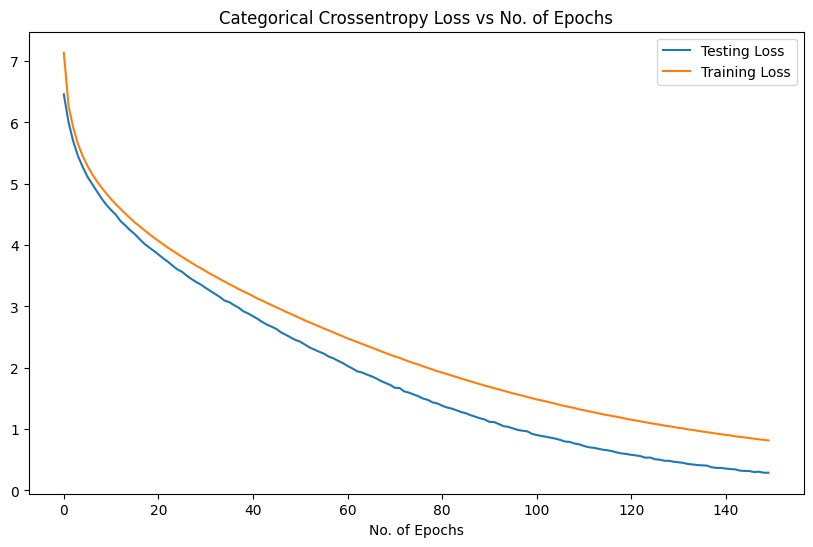

In [47]:
no_of_epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,1)
fig.set_size_inches(10,6)
ax.plot(no_of_epochs, test_loss_values, label = 'Testing Loss')
ax.plot(no_of_epochs, train_loss_values, label = 'Training Loss')
ax.set_title('Categorical Crossentropy Loss vs No. of Epochs')
ax.legend()
ax.set_xlabel("No. of Epochs")
plt.show()

In [50]:
def predict(input_document):
    # Clean and preprocess the input document
    input_document = "starttoken " + input_document + " endtoken"
    input_document = text_tokenizer.texts_to_sequences([input_document])
    input_document = tf.keras.preprocessing.sequence.pad_sequences(input_document, maxlen=max_text_len, padding='post', truncating='post')

    encoder_input = tf.expand_dims(input_document[0], 0)

    decoder_input = [summary_tokenizer.word_index["starttoken"]]
    output = tf.expand_dims(decoder_input, 0)
    
    for i in range(max_summary_len):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)

        predictions, attention_weights = transformer(
            encoder_input, 
            output,
            training=False, 
            enc_padding_mask=enc_padding_mask,
            look_ahead_mask=combined_mask,
            dec_padding_mask=dec_padding_mask
        )
        
        predictions = predictions[: ,-1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if predicted_id == summary_tokenizer.word_index["endtoken"]:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights


In [51]:
def summarize(input_document):
    # not considering attention weights for now, can be used to plot attention heatmaps in the future
    summarized = predict(input_document=input_document)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)  # not printing <go> token
    return summary_tokenizer.sequences_to_texts(summarized)[0]

In [52]:
import re
import emoji
from num_to_words import num_to_word
def preprocess_text(text):
    """
    Preprocess the given text.

    Parameters:
    - text (str): The text to be preprocessed

    Returns:
    - str: Preprocessed text.
    """
    # Convert emojis to textual representations and remove emoji placeholders
    text = re.sub(r':[a-zA-Z_]+:', ' ', emoji.demojize(str(text)))
    # Remove newline, carriage return, and tab characters, underscores, hyphens, tildes, plus signs, periods, special characters,
    text = re.sub(r'[\n\r\t_\-~\+\.\s]{2,}|[<>()|&©@#ø\[\]\'\",;:.।‘’]', ' ', str(text).replace('\u200d', '').lower())
    text = re.sub("([a-zA-Z])",' ',str(text)).lower() # (*Note : currently removing english or we can convert it to hindi using API*) --- For English Removal
    text = re.sub("(\s+)",' ',str(text)).lower() # remove multiple spaces.
    # Convert numeric values to their word representation
    text = re.sub(r'\b(\d+)\b', lambda x: num_to_word(int(x.group(0)), lang='hi'), text)
    text = re.sub(r'[\n\r\t_\-~\+\.\s]{2,}|[<>()|&©@#ø\[\]\'\",;:.।‘’]', ' ', str(text).replace('\u200d', '').lower())
    return text.strip()

# Example usage:
text_to_preprocess = "पूर्व प्रधानमंत्री और कांग्रेस के दिग्गज नेता राजीव गांधी की आज 75वीं जयंती है. इस मौके पर कांग्रेस अध्यक्ष राहुल गांधी, यूपीए चेयरपर्सन सोनिया गांधी, प्रियंका गांधी, पूर्व प्रधानमंत्री मनमोहन सिंह समेत कई बड़े कांग्रेस नेताओं ने उन्हें श्रद्धांजलि अर्पित की. प्रधानमंत्री नरेंद्र मोदी ने भी ट्वीट कर उन्हें श्रद्धांजलि दी. बता दें कि राजीव गांधी का जन्म आज ही के दिन 1944 में हुआ था. 21 मई, 1991 को उनकी हत्या कर दी गई थी. राजीव गांधी 1984 से 1989 तक प्रधानमंत्री रहे. तमिलनाडु के श्रीपेरंबुदुर में 21 मई, 1991 को आम चुनाव के प्रचार के दौरान एलटीटीई के एक आत्मघाती हमलावर ने राजीव गांधी की हत्या कर दी थी. 1984 में इंदिरा गांधी की हत्या के बाद वह भारी बहुमत के साथ प्रधानमंत्री बने. राजीव गांधी की राजनीति में कोई रूचि नहीं थी और वो एक एयरलाइन पायलट की नौकरी करते थे और उसी में खुश थे. लेकिन आपातकाल के उपरान्त जब इंदिरा गांधी को सत्ता छोड़नी पड़ी थी. वहीं साल 1980 में छोटे भाई संजय गांधी की हवाई जहाज दुर्घटना में मृत्यु हो जाने के बाद माता इंदिरा का सहयोग देने के लिए उन्होंने राजनीति में प्रवेश कर लिया."
preprocessed_text = preprocess_text(text_to_preprocess)

In [68]:
summarize(preprocessed_text)

'पूर्व प्रधानमंत्री और कांग्रेस नेता राहुल गांधी की आज इस मौके पर है कांग्रेस अध्यक्ष राजीव गांधी ने प्रियंका गांधी को दिया'

In [110]:
from tabulate import tabulate
from tqdm import tqdm

table_data = []
for i in tqdm(range(1000, 1600), desc="Processing Articles", unit="article"):
    summarized_article = summarize(test_df['Article'][i])
    actual_summary = test_df['Summary'][i]
    table_data.append([summarized_article, actual_summary])

Processing Articles: 100%|██████████| 600/600 [54:34<00:00,  5.46s/article] 


In [100]:
import pandas as pd

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Create a DataFrame from the table data
df = pd.DataFrame(table_data, columns=["Summarized Article", "Actual Summary"])

# Print the DataFrame
df

,Summarized Article,Actual Summary
0,जम्मू कश्मीर में बृहस्पतिवार को कोरोना वायरस संक्रमण के बासठ नए मामले सामने आए जिसके बाद यहां संक्रमितों की संख्या बढ़कर एक पच्चीस पच्चीस पच्चीस पच्चीस हो गई,जम्मू कश्मीर में बृहस्पतिवार को कोरोना वायरस संक्रमण के पैंसठ नए मामले सामने आए जिसके बाद यहां संक्रमितों की कुल संख्या बढ़कर एक पच्चीस एक सौ सत्रह हो गई अधिकारियों ने यह जानकारी दी उन्होंने बताया कि पिछले चौबिस घंटे में कोविड-उन्नीस से केंद्रशासित क्षेत्र में दो और मरीजों की मौत हो गई
1,फर्जी मैसेज के अनुसार शरीर का इस्तेमाल करने वालों के लिए लोगों से कोई भी नहीं नजर आता है इस बात का गलत वीडियो सोशल मीडिया पर वायरल हो रहा है और वायरल का कोई जानकारी नहीं है,अगर आप भी कोरोना से बचाव या उपचार के लिए सोशल मीडिया पर वायरल किसी भी तरह के नुस्खे को अपना रहे हैं तो पहले उसकी सत्यता अवश्य जांच लें वरना आपको लेने के देने पड़ सकते हैं
2,उत्तराखंड के मुख्यमंत्री सिंह रावत ने राजकीय जनरल बिपिन रावत के निधन पर राज्य में शोक जताते हुए शुक्रवार को पांच प्रमुख जनरल बिपिन रावत से निधन किया है,देहरादून में जारी एक संदेश में धामी ने जनरल रावत उनकी पत्नी मधुलिका तथा अन्य लोगों की मृत्यु पर गहरा दुख जताया तथा दिवंगत आत्माओं की शांति की प्रार्थना की है
3,दीप सिद्धू के सामने वाले सामने हुई हिंसा पर केस दर्ज हुई है इस मामले में मुख्य आरोपी दीप सिद्धू की तलाश में है लेकिन पंजाब पुलिस की टीम लगातार भी है लेकिन अभी तक अभी तक ड्रग्स की जा रही है लेकिन अब तक ड्रग्स से कनेक्शन टूट सकती है,गणतंत्र दिवस के दिन लाल किले पर हुई हिंसा के बाद से मामले में मुख्य आरोपी एक्टर दीप सिद्धू की तलाश में क्राइम ब्रांच की कई टीमें पंजाब में छापेमारी कर रही है लेकिन दीप सिद्दू अभी तक पुलिस की गिरफ्त से बाहर है पुलिस ने दीप सिद्धू के ऊपर एक लाख का इनाम भी रखा है
4,पिछले कुछ दिनों से देशभर में मानसून की बरसात देखने को मिल रही है मौसम विभाग आने वाले आने वाले कुछ दिनों में यह बारिश हो सकती है कि देश की ज्यादातर बारिश से हो सकती है,मौसम विभाग के अनुसार बीस अगस्त को उत्तराखंड में कुछ जगहों पर भारी से बहुत भारी बरसात के आसार हैं इसके अलावा हिमाचल प्रदेश हरियाणा उत्तर प्रदेश मध्य प्रदेश और बिहार में कुछ जगहों पर भारी बरसात की चेतावनी जारी की गई है
5,एक आधिकारिक आदेश ने कहा है कि उनके खिलाफ राष्ट्रीय जनता और देश के लोगों से भी हर साल दो हज़ार उन्नीस के लिए देश के साथ खड़े किए गए हैं और वह देश विरोधी विरोधी से भी आतंकवाद और आतंकवाद के लिए मजबूर हैं,दिल्ली की एक अदालत ने कश्मीरी अलगाववादी नेता आसिया अंद्राबी और उनकी दो सहयोगियों के खिलाफ भारत सरकार के खिलाफ युद्ध छेड़ने और देश में आतंकी वारदात की कथित तौर पर साजिश रचने के लिए आतंकवाद राजद्रोह और अन्य आरोप तय किए हैं
6,उत्तर प्रदेश में विभिन्न चिकित्सकों के काम करने के बावजूद अधिकारियों पर स्वास्थ्य अधिकारी व चिकित्सकों का आरोप लगाते हुए प्रदेश के बारह से चौदह और डॉक्टर कर्मचारी पदों से इस्तीफा दे दिया है,सीमित संसाधनों में काम करने के बावजूद प्रशासनिक अधिकारियों पर अभद्रता और शोषण का आरोप लगाते हुये प्रांतीय चिकित्सा सेवा संघ से जुड़े चौदह डॉक्टरों ने उत्तर प्रदेश के उन्नाव में सामूहिक रूप से इस्तीफा दे दिया है
7,पश्चिम बंगाल में भाजपा की जनता पार्टी द्वारा पश्चिम बंगाल के कांग्रेस नेता भारतीय जनता पार्टी के नेताओं की केंद्रीय जनता पार्टी में शामिल हो गए हैं,ममता बनर्जी की पार्टी छोड़ने वाले पश्चिम बंगाल के दिग्गज नेता शुभेंदु अधिकारी भारतीय जनता पार्टी में शामिल हो गए हैं उन्होंने गृह मंत्री अमित शाह की रैली में भारतीय जनता पार्टी का दामन थामा
8,राहुल गांधी ने मंगलवार को राहुल गांधी को विज्ञान को प्रधानमंत्री राहुल गांधी को संबोधित करते हुए कहा कि देश में वायरस से सबसे ज्यादा होता है और वह एक दिन में आ रहे हैं,वीडी शर्मा ने राहुल गांधी को कहा कि देश में साठ करोड़ से ज्यादा लोगों को वैक्सीन का टीका लग चुका है उन्होंने राहुल गांधी को अपने लोकसभा क्षेत्र वायनाड की सुध लेने की सलाह भी दी और कहा कि वायनाड में कोरोना वायरस की साप्ताहिक संक्रमण की दर इक्कीस इक्कीस प्रतिशत तक पहुंच गई है
9,पंजाब कांग्रेस में राहुल गांधी को लेकर बड़ा फैसला ले लिया जा सकता है पार्टी के राष्ट्रीय महासचिव हरीश रावत और हरीश रावत के साथ मुलाकात के लिए जा सकते है,सिद्धू के साथ बैठक के बाद हरीश रावत ने कहा सिद्धू ने आपसे स्पष्ट कहा है कि कांग्रेस अध्यक्ष सोनिया गांधी राहुल गांधी और प्रियंका गांधी का जो आदेश होगा वह उन्हें मान्य होगा और वह उसका पालन करेंगे


In [56]:
# Reset display options to default values
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

In [57]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=b996eb06a3a56791ad903a9cb23b127d712669cdb7b35ab723e0d622f09ecc62
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [58]:
!pip install rouge

In [59]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.6 MB/s eta 0:00:00a 0:00:01


In [61]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from rouge import Rouge
import pandas as pd
from tqdm import tqdm

# Load SBERT model
sbert_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [62]:
# Summarize the first 100 articles
output_summaries = []
for article in tqdm(test_df['Article'][:100], desc="Summarizing", unit="article"):
    summary = summarize(article)
    output_summaries.append(summary)
output_df = pd.DataFrame({'Summaries': output_summaries})

Summarizing: 100%|██████████| 100/100 [09:15<00:00,  5.55s/article]


In [79]:
# Define function to calculate SBERT score
def calculate_sbert_score(sentences1, sentences2):
    embeddings1 = sbert_model(sentences1)
    embeddings2 = sbert_model(sentences2)
    similarities = np.inner(embeddings1, embeddings2)
    # Take the mean of similarities as the final score
    sbert_score = np.mean(similarities)
    return sbert_score

# Calculate SBERT scores
sbert_scores = []
for summary, reference in zip(output_df['Summaries'], test_df['Summary'][:100]):
    sbert_score = calculate_sbert_score([summary], [reference])
    sbert_scores.append(sbert_score)

mean_sbert_score = np.mean(sbert_scores)
print("Mean SBERT Score:", mean_sbert_score)

Mean SBERT Score: 0.8104985


In [78]:
# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(output_df['Summaries'], test_df['Summary'][:100], avg=True)

print("ROUGE Scores:")
for metric, values in scores.items():
    print(f'{metric}:')
    for measure, score in values.items():
        print(f'  {measure}: {score}')

ROUGE Scores:
rouge-1:
  r: 0.36880986693146917
  p: 0.44081202451535534
  f: 0.3931552889455127
rouge-2:
  r: 0.1493622729055448
  p: 0.1620874599063098
  f: 0.1508881447523214
rouge-l:
  r: 0.2996781596201521
  p: 0.3555125973295636
  f: 0.31822365973485495


In [64]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00


In [66]:
!pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.4 MB/s eta 0:00:00


In [77]:
from bert_score import score
import torch

# Define a function to calculate BERTScore
def calculate_bert_score(hypotheses, references):
    _, _, bert_scores = score(hypotheses, references, lang='hi',device='cpu')
    return bert_scores.mean().item()

# Calculate BERTScore for the first 100 articles
bert_scores = []
for article_summary, reference_summary in zip(output_summaries, test_df['Summary'][:100]):
    bert_score = calculate_bert_score([article_summary], [reference_summary])
    bert_scores.append(bert_score)

# Print the average BERTScore
average_bert_score = sum(bert_scores) / len(bert_scores)
print("Average BERTScore for the first 100 articles:", average_bert_score)

Average BERTScore for the first 100 articles: 0.736597318649292


# Saving model

In [71]:
transformer.save_weights(f"/kaggle/working/transformer.weights.h5")

In [75]:
# transformer.save('/kaggle/working/my_model.keras')
transformer.save("/kaggle/working/my_model_transformer.keras")

In [73]:
current_weights = transformer.get_weights()
    # Save the current weights using pickle
with open("/kaggle/working/current_weights.pickle", 'wb') as handle:
        pickle.dump(transformer.get_weights(), handle)

In [72]:
import pickle
# Open the file in binary write mode and use pickle to dump the object
with open("/kaggle/working/article_tokenizer.pickle", 'wb') as handle:
    pickle.dump(text_tokenizer, handle)
# Open the file in binary write mode and use pickle to dump the object
with open("/kaggle/working/summary_tokenizer.pickle", 'wb') as handle:
    pickle.dump(summary_tokenizer, handle)
    

# Open the file in binary write mode and use pickle to dump the object
with open("/kaggle/working/article_matrix.pickle", 'wb') as handle:
    pickle.dump(text_matrix, handle)
# Open the file in binary write mode and use pickle to dump the object
with open("/kaggle/working/summary_matrix.pickle", 'wb') as handle:
    pickle.dump(summ_matrix, handle)

In [ ]:
import pickle

# Load article tokenizer
with open("/kaggle/working/article_tokenizer.pickle", 'rb') as handle:
    text_tokenizer = pickle.load(handle)
# Load summary tokenizer
with open("/kaggle/working/summary_tokenizer.pickle", 'rb') as handle:
    summary_tokenizer = pickle.load(handle)

# Load article matrix
with open("/kaggle/working/article_matrix.pickle", 'rb') as handle:
    text_matrix = pickle.load(handle)
# Load summary matrix
with open("/kaggle/working/summary_matrix.pickle", 'rb') as handle:
    summ_matrix = pickle.load(handle)

In [107]:
def predict_with_load(input_document):
    # Load the transformer model

    # Hyperparameters
    # Hyperparameters
    num_layers = 4
    d_model = article_embeddings_matrix.shape[1]
    dff = 512
    num_heads = 10
    max_article_length = 300
    max_summ_len = 75
    encoder_vocab_size = 26667
    decoder_vocab_size = 8461
    learning_rate=0.0001
        
#     transformer_predict = Transformer(
#             num_layers, 
#             d_model, 
#             num_heads, 
#             dff,
#             encoder_vocab_size, 
#             decoder_vocab_size, 
#             pe_input = encoder_vocab_size, 
#             pe_target = decoder_vocab_size,
#             text_matrix = text_matrix, 
#             max_len_text = max_len_text, 
#             summ_matrix = summ_matrix, 
#             max_len_summ = max_len_summ
# )
   
    # Load the model with the custom objects
    transformer_predict = tf.keras.models.load_model('/kaggle/working/my_model_transformer.keras')
        # Define a dictionary containing the custom objects
#     custom_objects = {'Transformer': Transformer}

    # Load the model with the custom objects
#     transformer_predict = tf.keras.models.load_model('/kaggle/working/my_model.keras', custom_objects=custom_objects)/

 
    
#     # Load the saved weights into the model
#     transformer_predict.load_weights("/kaggle/working/transformer.weights.h5")  

#     # Compare the two sets of weights
#     current_weights = transformer.get_weights()
#     # Save the current weights using pickle
#     with open("/kaggle/working/current_weights.pickle", 'wb') as handle:
#         pickle.dump(transformer.get_weights(), handle)

# #     # Load the weights from the saved file
#     with open("/kaggle/working/current_weights.pickle", 'rb') as handle:
#         loaded_weights = pickle.load(handle)

# #     # Set the loaded weights to the model
#     transformer_predict.set_weights(loaded_weights)
    
    loaded_weights = transformer_predict.get_weights()
    current_weights = transformer.get_weights()
    
#     print("Loaded:\n",loaded_weights)
#     print("Current:\n",current_weights)

#     transformer_predict = tf.keras.models.load_model("/kaggle/working/my_model_transformer.h5", custom_objects={"Transformer": Transformer})
    
    # Check if the weights are equal
    are_equal = all([np.array_equal(w1, w2) for w1, w2 in zip(loaded_weights, current_weights)])

    if are_equal:
        print("The loaded weights and the current model weights are identical.")
    else:
        print("The loaded weights and the current model weights are different.")
    
    # Clean and preprocess the input document
    input_document = "starttoken " + input_document + " endtoken"
    input_document = text_tokenizer.texts_to_sequences([input_document])
    input_document = tf.keras.preprocessing.sequence.pad_sequences(input_document, maxlen=max_text_len, padding='post', truncating='post')

    encoder_input = tf.expand_dims(input_document[0], 0)

    decoder_input = [summary_tokenizer.word_index["starttoken"]]
    output = tf.expand_dims(decoder_input, 0)
    
    for i in range(max_summary_len):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)

        predictions, attention_weights = transformer_predict(
            encoder_input, 
            output,
            training=False, 
            enc_padding_mask=enc_padding_mask,
            look_ahead_mask=combined_mask,
            dec_padding_mask=dec_padding_mask
        )
        
        predictions = predictions[: ,-1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if predicted_id == summary_tokenizer.word_index["endtoken"]:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [108]:
def summarize_with_load(input_document):
    # not considering attention weights for now, can be used to plot attention heatmaps in the future
    summarized = predict_with_load(input_document=input_document)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)  # not printing <go> token
    return summary_tokenizer.sequences_to_texts(summarized)[0]

In [ ]:
summarize_with_load(preprocessed_text)